In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

dataset_train = pd.read_excel('datasets/Train_DT.xlsx')
dataset_test = pd.read_excel('datasets/Test_DT.xlsx')

dataset_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [129]:
dataset_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [130]:
dt_isna_sum = dataset_train.isna().sum()
dt_isna_sum[dt_isna_sum > 0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [131]:
dataset_train.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [132]:
for dataset in (dataset_train, dataset_test):   
    dataset.Item_Weight = dataset.Item_Weight.fillna(
        dataset.groupby('Item_Identifier').Item_Weight.transform('median')
    )
    dataset.Outlet_Size.fillna('Unknown', inplace=True)
    dataset.Item_Weight.fillna(dataset.Item_Weight.mean(), inplace=True)
    dt_isna_sum = dataset.isna().sum()
    print(dt_isna_sum[dt_isna_sum > 0])


Series([], dtype: int64)
Series([], dtype: int64)


In [133]:
import plotly.express as px
fig = px.pie(
    dataset_train.Outlet_Size.value_counts(), 
    names=dataset_train.Outlet_Size.value_counts().index, 
    values=dataset_train.Outlet_Size.value_counts()
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [134]:
fig = px.bar(
    dataset_train.Outlet_Size.value_counts(),
    x=dataset_train.Outlet_Size.value_counts().index,
    y=dataset_train.Outlet_Size.value_counts(),
    text_auto=".2s",
    color=dataset_train.Outlet_Size.value_counts(),
    title="Распределение магазинов по размерам",
    height=400,
    width=1200,
)
fig.show()

In [135]:
dataset_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Unknown,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Unknown,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Unknown,Tier 2,Supermarket Type1
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Unknown,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Unknown,Tier 2,Supermarket Type1


Starting training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


Plotting feature importances...


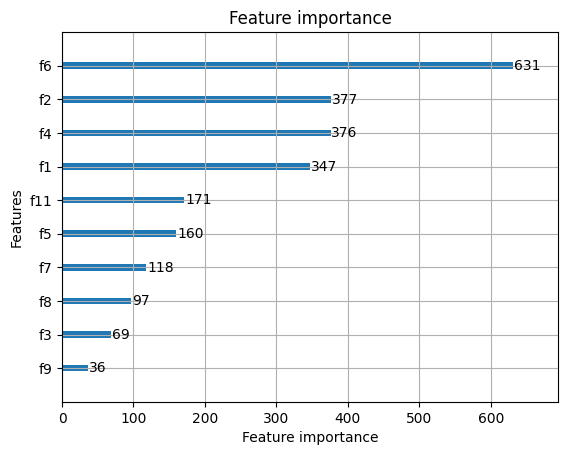

Plotting 2th tree...


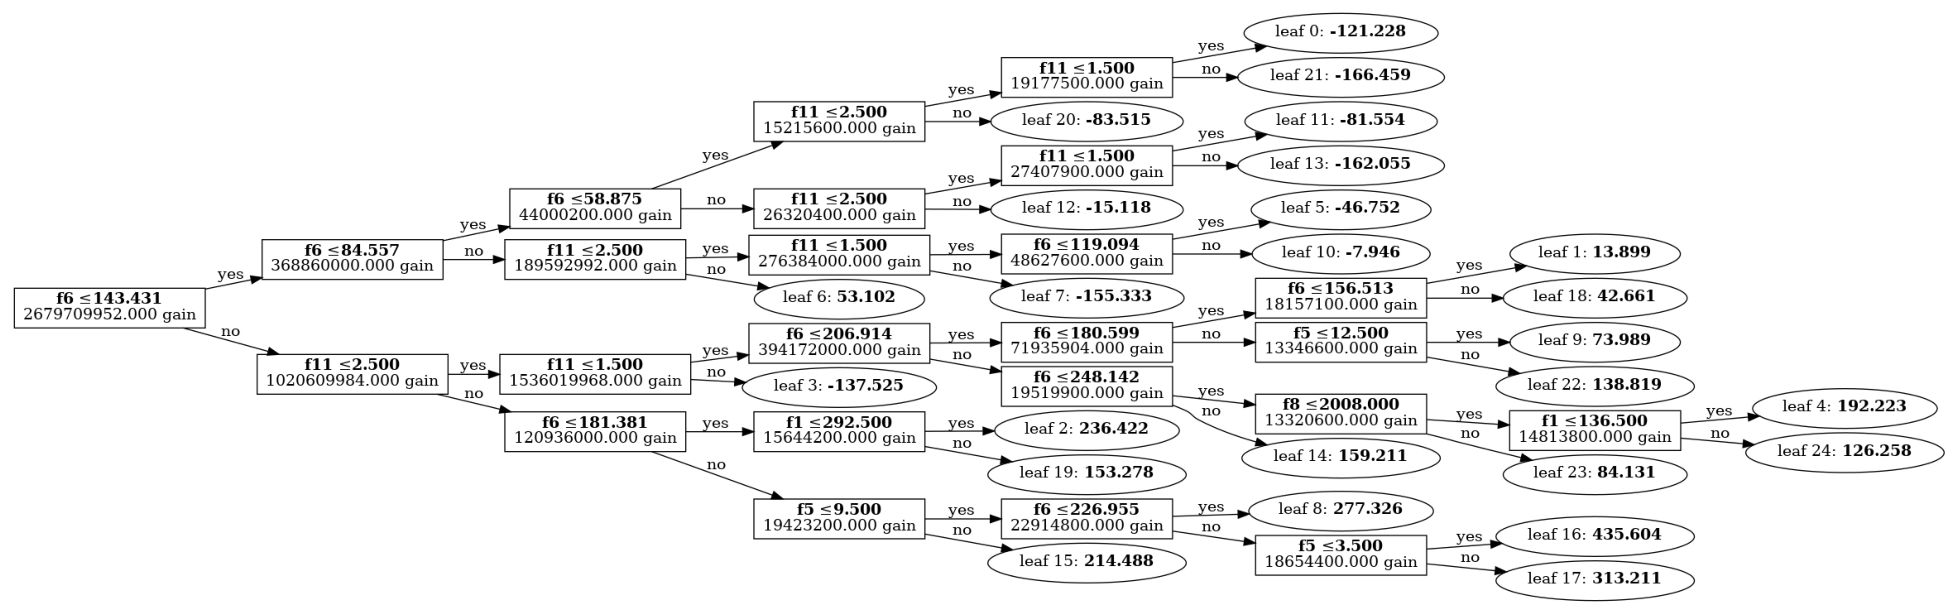

Plotting 2th tree with graphviz...


'Tree1.gv.pdf'

Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/
No applications found for mimetype: application/pdf
./usr/bin/xdg-open: 882: x-www-browser: not found
/usr/bin/xdg-open: 882: firefox: not found
/usr/bin/xdg-open: 882: iceweasel: not found
/usr/bin/xdg-open: 882: seamonkey: not found
/usr/bin/xdg-open: 882: mozilla: not found
/usr/bin/xdg-open: 882: epiphany: not found
/usr/bin/xdg-open: 882: konqueror: not found
/usr/bin/xdg-open: 882: chromium: not found
/usr/bin/xdg-open: 882: chromium-browser: not found
/usr/bin/xdg-open: 882: google-chrome: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no metho

In [136]:
   

from sklearn.model_selection import train_test_split


for dataset in (dataset_test, dataset_train):    
    dataset.Item_Identifier = pd.factorize(dataset.Item_Identifier)[0]
    dataset.Item_Fat_Content = pd.factorize(dataset.Item_Fat_Content)[0]
    dataset.Item_Type = pd.factorize(dataset.Item_Type)[0]
    dataset.Item_Item_Type = pd.factorize(dataset.Item_Type)[0]
    dataset.Outlet_Identifier = pd.factorize(dataset.Outlet_Identifier)[0]
    dataset.Outlet_Size = pd.factorize(dataset.Outlet_Size)[0]
    dataset.Outlet_Location_Type = pd.factorize(dataset.Outlet_Location_Type)[0]
    dataset.Outlet_Type = pd.factorize(dataset.Outlet_Type)[0]

X = dataset_train.drop('Item_Outlet_Sales', axis=1)
y = dataset_train.Item_Outlet_Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

import lightgbm as lgb

lgb_train = lgb.Dataset(X_train,y_train)
lgb_test = lgb.Dataset(X_test,y_test, reference=lgb_train)

params = {
    'num_leaves': 25,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

print('Starting training...')
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                )


print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

print('Plotting 2th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=2, figsize=(25, 25), show_info=['split_gain'])
plt.show()

print('Plotting 2th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=2, name='Tree1')
graph.render(view=True)